# Using only one piece of information, "the number of years used", guessing the Mac's Middle-high prices

## Load Data

(80, 2)
   used_years  price
0        2.65    175
1        3.80     63
2        0.95    273
3        4.50    133
4        4.45    106


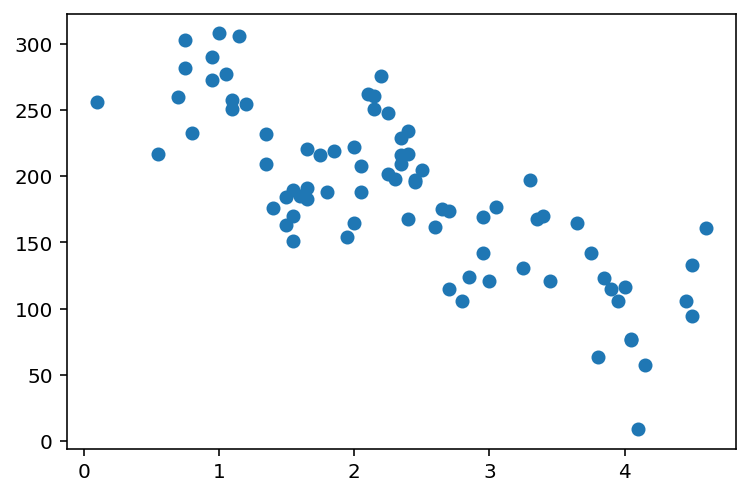

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
macbook = pd.read_csv('~/project/AIFFEL_Study/e5_linear_regression/macbook_data/data/macbook.csv')
print(macbook.shape)
print(macbook.head())
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()


### Correlation
![상관관계](correlation.png)

In [7]:
import numpy as np
# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

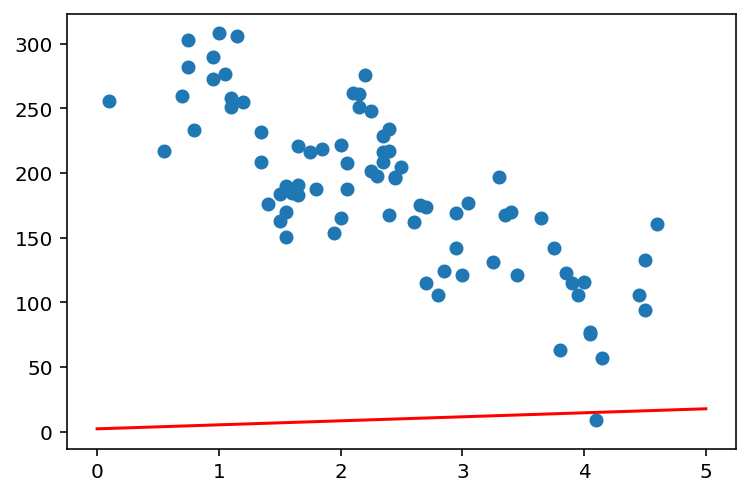

In [8]:
x = macbook["used_years"].values
y = macbook["price"].values
def model(x, w, b):
    y = w * x + b
    return y
# set parameter
w = 3.1
b = 2.3

x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [14]:
x = macbook["used_years"].values
y = macbook["price"].values
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
macbook['prediction'] = prediction
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


## Error

* MAE : Mean Absolute Error, 오차의 절댓값의 평균   

* MSE : Mean Squared Error, 오차의 제곱의 평균   

* RMSE : Root Mean Squared Error, MSE의 제곱근   

* R-squared : Coefficient of Determination, 결정 계수

In [15]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)
print(w,b)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]
3.1 2.3


In [16]:
rmse = RMSE(predictions, y)
rmse

188.81322969819274

### Loss Function

In [17]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L

![Loss](graph_w.png)
![Loss2](graph_w2.png)
![Loss3](graph_w3.png)

In [19]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

## 교육 순서

1. 입력 데이터 x와 정답 데이터 y 준비
2. 초기 w, b를 랜덤하게 선택
3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
5. 계산된 gradient를 활용해서 w′=w−ηg , b′=b−ηg로 업데이트
6. 3~5 번의 과정을 손실함수가 충분히 줄어들 때까지 반복

In [20]:
LEARNING_RATE = 1
x = macbook["used_years"].values
y = macbook["price"].values

w = 3.1
b = 2.3
# 손실 값
losses = []

for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


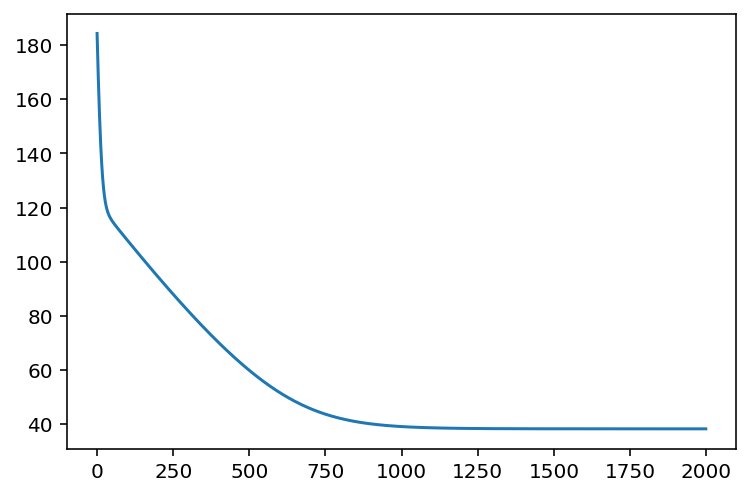

In [21]:
plt.plot(losses)
plt.show()

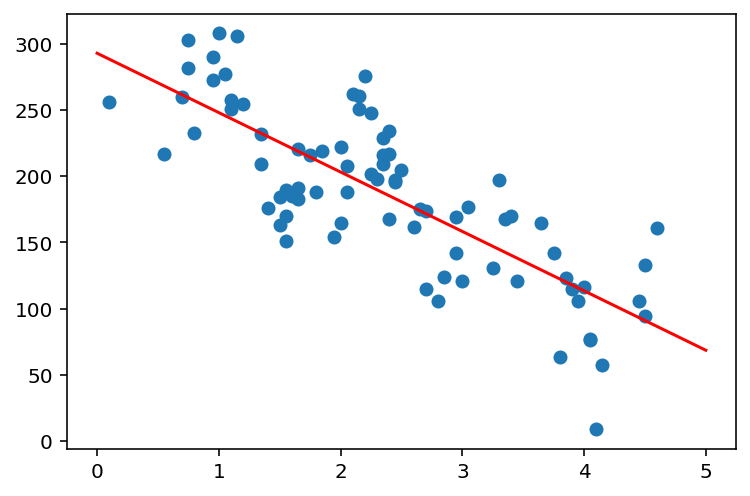

In [22]:
# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")


# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [23]:
test = pd.read_csv("~/project/AIFFEL_Study/e5_linear_regression/macbook_data/data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [24]:
test_x = test['used_years'].values
test_y = test['price'].values
prediction = model(test_x, w, b)
test['prediction'] = prediction
test['error'] = test['price'] - test['prediction']
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
rmse

45.03918284717212

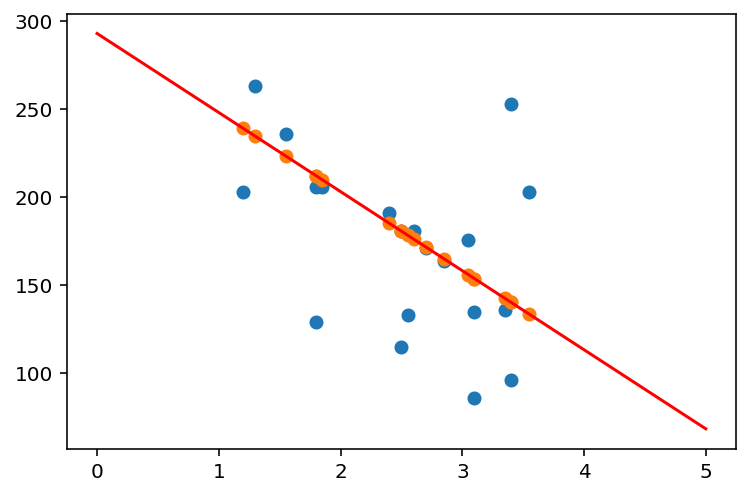

In [25]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()